# Project 01
### Paola M Hunt

Objective: To develop a linear regression model that will estimate the natural logarithm of the average miles per gallon for a specified vehicle based on its weight.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Importing and Viewing the Data
Task 1: Import and view data

In [2]:
df = pd.read_table(filepath_or_buffer='data/auto_data.txt', sep='\t')
weight = list(df.wt)
mpg = list(df.mpg)
ln_mpg = list(df.ln_mpg)

Task 2 - Confirm list contains 398 values

In [3]:
print(len(weight),
     len(mpg),
     len(ln_mpg)
     )

398 398 398


Task 3 - View information for the first 10 vehicles in the data sets

In [4]:
print('Weight'.rjust(6), 'MPG'.rjust(8), 'LN_MPG'.rjust(10))
print('--------------------------')
for i in range(0,10):
    print(str(weight[i]).rjust(6), 
          str(mpg[i]).rjust(8),
          str(round(ln_mpg[i],4)).rjust(10)
         )

Weight      MPG     LN_MPG
--------------------------
  3190     27.2     3.3032
  1985     32.8     3.4904
  3410     18.1     2.8959
  4080     17.5     2.8622
  3530     25.4     3.2347
  1773     31.0      3.434
  2670     27.4     3.3105
  1755     39.1     3.6661
  2188     34.3     3.5351
  2155     30.0     3.4012


Task 4 - Create two scatter plots. One will represent the relationship between MPG and Vehicle Weight. The second will represent the natural log of MPG and Vehicle Weight.

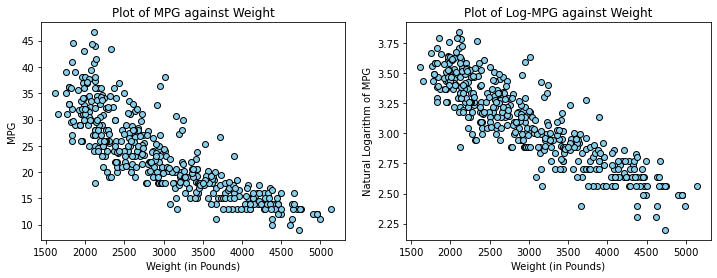

In [5]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(weight, mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('MPG')
plt.title('Plot of MPG against Weight')

plt.subplot(1,2,2)
plt.scatter(weight, ln_mpg, c='skyblue', edgecolor='k')
plt.xlabel('Weight (in Pounds)')
plt.ylabel('Natural Logarithm of MPG')
plt.title('Plot of Log-MPG against Weight')
plt.show()


The scatter plot representing the MPG v Weight of the vehicle in contrast of the scatter plot representing the Log-MPG v Weight of the vehicle bends slightly. Since we are working with linear regression, we will use the second model as it has more of a stright appearance.

## Part 2: Splitting the Data
For the second part of the project, I will be splititng the data into two sets: training and tests.

In [6]:
x_train = weight[:300]
x_test = weight[-98:]

y_train = ln_mpg[:300]
y_test = ln_mpg[-98:]

mpg_train = mpg[:300]
mpg_test = mpg[-98:]

n_train = len(x_train)
n_test = len(x_test)

print('Training Set Size:', str(n_train).rjust(1),
      '\nTest Set Size:', str(n_test).rjust(6)
     )


Training Set Size: 300 
Test Set Size:     98


Now I will create scatter plots to visualize the data in the training and test sets.

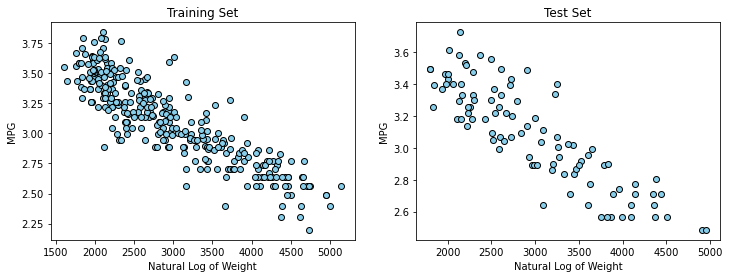

In [7]:
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.xlabel('Natural Log of Weight')
plt.ylabel('MPG')
plt.title('Training Set')

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.xlabel('Natural Log of Weight')
plt.ylabel('MPG')
plt.title('Test Set')
plt.show()

## Part 3: Descriptive Statistics
In this part of the project, I will calculate the mean and variance for the response variable and predictor variable. 

First, we will start by calculating the mean of the X values (representing weight), and the mean of the Y values (representing log-MPG).

In [8]:
mean_x = (1/n_train)*(sum(x_train))
mean_y = (1/n_train)*(sum(y_train))

print('Mean of X =', round(mean_x, 2),
      '\nMean of Y =', round(mean_y,4))

Mean of X = 2968.62 
Mean of Y = 3.1069


I will now be calculating the sum of squared deviations for X and Y.

In [9]:
Sxx = 0

for i in range(0, len(x_train)):
    Sxx += (x_train[i] - mean_x)**2

Syy = 0

for i in range(0, len(y_train)):
    Syy += (y_train[i] - mean_y)**2

print('Sxx =', round(Sxx, 2),
      '\nSyy =', round(Syy, 4)
     )


Sxx = 224006920.44 
Syy = 36.0746


I will now calculate the variance of the training values of X and Y

In [10]:
var_x = (Sxx/(n_train-1))
var_y = (Syy/(n_train-1))

print('Variance of X =', round(var_x, 2),
     '\nVariance of Y =', round(var_y,4))

Variance of X = 749187.02 
Variance of Y = 0.1207


I will now calculate the variance of the training values of X and Y.

## Part 4: Linear Regression Model
In part 4, I will calculate  one more variable needed to get  the coefficients for the linear regression model.

In [11]:
Sxy = 0

for i in range(len(x_train)):
    Sxy += (x_train[i]-mean_x) * (y_train[i]-mean_y)

print('Sxy =', round(Sxy, 2))

Sxy = -78999.13


I will now calculate the coefficients for the regression model.


In [12]:
beta_1 = Sxy / Sxx
beta_0 = mean_y - beta_1 * mean_x



print('beta_0 =', round(beta_0,4), '\nbeta_1 =', round(beta_1, 8))

beta_0 = 4.1538 
beta_1 = -0.00035266


Now I will plot the regression line on top of the scatter plots for the training and test sets.

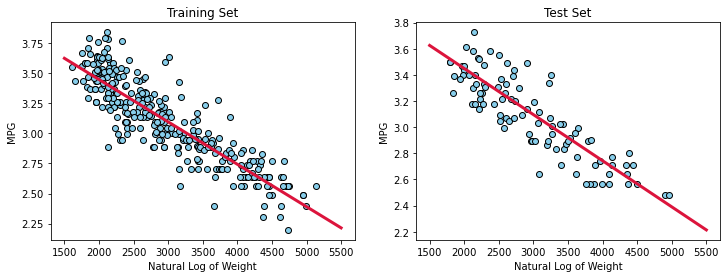

In [13]:
y_vals = [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5500]
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.scatter(x_train, y_train, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Natural Log of Weight')
plt.ylabel('MPG')
plt.title('Training Set')
plt.subplot(1,2,2)
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5500], y_vals, c='crimson', lw=3)
plt.xlabel('Natural Log of Weight')
plt.ylabel('MPG')
plt.title('Test Set')
plt.show()

## Part 5: Training Score
In this section, I will be calculating the training r-squared score. I will first calculate the estimated response values for the training set.

In [14]:
pred_y_train = []

for i in range(0, len(x_train)):
    templist = beta_0 + beta_1 * x_train[i]
    pred_y_train.append(templist)


Next, I will calculate the residuals for the training set.

In [15]:
error_y_train = []

for i in range(0, len(y_train)):
    templist = y_train[i] - pred_y_train[i]
    error_y_train.append(templist)
    

I will now display the true Y values , the predicted Y values, adn the residual for each of the first 10 observations in the training set.

In [16]:
print('True y'.rjust(6), 'Pred y'.rjust(10), 'Error'.rjust(10))
print('----------------------------')
for i in range(0, 10):
    print(str(round(y_train[i], 4)).rjust(6),
          str(round(pred_y_train[i], 4)).rjust(10),
          str(round(error_y_train[i],4)).rjust(10)
         )



True y     Pred y      Error
----------------------------
3.3032     3.0289     0.2743
3.4904     3.4538     0.0366
2.8959     2.9513    -0.0554
2.8622      2.715     0.1472
3.2347     2.9089     0.3258
 3.434     3.5286    -0.0946
3.3105     3.2122     0.0983
3.6661     3.5349     0.1312
3.5351     3.3822     0.1529
3.4012     3.3939     0.0073


Next, I will calculate the sum of squared errors for the training set.

In [17]:
sse_train = 0
for i in range(len(error_y_train)):
    sse_train += error_y_train[i]**2

print('Training SSE =', round(sse_train, 4))

Training SSE = 8.2145


Now, I will calculate the r-squared score for the training set.

In [18]:
r2_train = 1 - ( sse_train / Syy)
print('Training r-Squared =', round(r2_train, 4))

Training r-Squared = 0.7723


## Part 6: Test Score
In this section, I will calculate the test r-squared score. First, I will start by calculating the estimated response values for the test set. 

In [19]:
pred_y_test = []

for i in range(0, len(x_test)):
    templist = beta_0 + beta_1 * x_test[i]
    pred_y_test.append(templist)

Next, I will calculare the residuals for the test set.

In [20]:
error_y_test = []

for i in range(0, len(y_test)):
    templist = y_test[i] - pred_y_test[i]
    error_y_test.append(templist)

Now, I will display the true Y values, predicted Y values, and the residual values for each of the first 10 observations in the test set.

In [21]:
print('True y'.rjust(6), 'Pred y'.rjust(10), 'Error'.rjust(10))
print('----------------------------')
for i in range(0, 10):
    print(str(round(y_test[i], 4)).rjust(6),
          str(round(pred_y_test[i], 4)).rjust(10),
          str(round(error_y_test[i],4)).rjust(10)
         )


True y     Pred y      Error
----------------------------
2.6391     3.0655    -0.4264
2.8904      2.819     0.0714
2.9957     2.8663     0.1294
2.5649      2.789    -0.2241
2.9957     3.2433    -0.2476
2.9444     3.1205    -0.1761
2.4849     2.4237     0.0612
3.2581     3.3586    -0.1005
3.7257     3.3977      0.328
2.5649     2.7474    -0.1825


I will now calculate the sum of squared errors for the test set.

In [22]:
sse_test = 0
for i in range(len(error_y_test)):
    sse_test += error_y_test[i]**2

print('Test SSE =', round(sse_test, 4))

Test SSE = 2.4848


Next, I will calculate the Syy value for the test set which is needed in order to calculate the test r-squared score.

In [23]:
mean_y_test = (1/n_test)*(sum(y_test))

Syy_test = 0

for i in range(0, len(y_test)):
    Syy_test += (y_test[i] - mean_y_test)**2

r2_test = 1 - ( sse_test / Syy_test)
print('Test r-Squared =', round(r2_test, 4))


Test r-Squared = 0.7435


I will now create a plot to visualize the error for the observation in the test set.

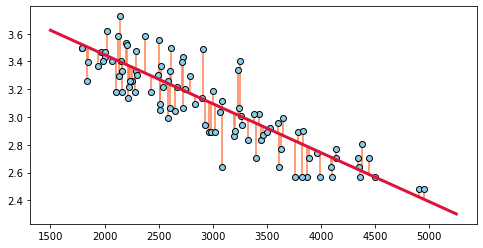

In [24]:
plt.figure(figsize=[8,4])
plt.scatter(x_test, y_test, c='skyblue', edgecolor='k')
plt.plot([1500,5250], [beta_0 + beta_1 * 1500, beta_0 + beta_1 * 5250],
 c='crimson', lw=3)
for i in range(n_test):
    plt.plot([x_test[i], x_test[i]], [pred_y_test[i], y_test[i]],
 c='coral', zorder=0)
plt.show()

## Part 7: Transforming Test Predictions
In this part, I will be calculating estimates for th eaverage MPG observation in the test set.

In [25]:
e =  2.718281828
pred_mpg_test = []

for i in range(0, len(pred_y_test)):
    templist = e**pred_y_test[i]
    pred_mpg_test.append(templist)

Here I will calculate the error in each estimate for the average MPG.

In [26]:
error_mpg_test=[]

for i in range(0, len(mpg_test)):
    templist = pred_mpg_test[i] - mpg_test[i]
    error_mpg_test.append(templist)

Finally, I will display the true MPG, the estimated MPG, and the estimation error for each of the first 10 observations in the set.

In [27]:
print('True MPG'.rjust(8), 'Pred MPG'.rjust(12), 'Error'.rjust(9))
print('-------------------------------')
for i in range(0, 10):
    print(str(round(mpg_test[i], 1)).rjust(8),
          str(round(pred_mpg_test[i], 1)).rjust(12),
          str(round(error_mpg_test[i],1)).rjust(9)
         )

True MPG     Pred MPG     Error
-------------------------------
    14.0         21.4       7.4
    18.0         16.8      -1.2
    20.0         17.6      -2.4
    13.0         16.3       3.3
    20.0         25.6       5.6
    19.0         22.7       3.7
    12.0         11.3      -0.7
    26.0         28.7       2.7
    41.5         29.9     -11.6
    13.0         15.6       2.6
